In [1]:
!pip install fredapi
!pip install yellowbrick

In [2]:
!pip install seaborn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
import pylab 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
import os
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

In [5]:
from fredapi import Fred
fred = Fred(api_key='c351789db598f69b8d4c64574d1cf1da')

In [6]:
from yellowbrick.regressor import CooksDistance
import pandas as pd
import numpy as np

In [7]:
df={}
df['TY10'] = fred.get_series('DGS10')
df['FED']= fred.get_series('FEDFUNDS')
df['SHEET']=fred.get_series('WALCL')
df['BUND10']=fred.get_series('IRLTLT01DEM156N')
df['UNP']=fred.get_series('UNRATE')
df['SPX']=fred.get_series('SP500')
df['WTI']=fred.get_series('DCOILWTICO')
df['GDPE']=fred.get_series('GDPC1')
df['PCEEUU']=fred.get_series('PCEPILFE')
df['CPIGER']=fred.get_series('DEUCPIALLMINMEI')
df['RETAIL']=fred.get_series('RRSFS')
df['GOODS']=fred.get_series('DGORDER')
df['MANUF']=fred.get_series('IPMAN')
df['INVENT']=fred.get_series('BUSINV')
df['GDPP']=fred.get_series('A191RL1Q225SBEA')
df['INDPP']=fred.get_series('INDPRO')
df['NONFARM']=fred.get_series('PAYEMS')
df['TBILL3']=fred.get_series('DTB3')
df['M2']=fred.get_series('M2')
df['GDPGER']=fred.get_series('CPMNACSCAB1GQDE')
df['M1']=fred.get_series('M1')
df['VIX']=fred.get_series('VIXCLS')
df['COMERLOAN']=fred.get_series('TOTCI')
df['TOTALASSETBANK']=fred.get_series('TLAACBW027SBOG')
df['CHIFEDCONDIT']=fred.get_series('NFCI')
df['CHIFEDACT']=fred.get_series('CFNAI')
df['CONSUSENT']=fred.get_series('UMCSENT')
df['TY2']= fred.get_series('DGS2')
df = pd.DataFrame(df)

In [8]:
df=df.fillna(method="ffill")
df=df.dropna()

In [9]:
df

,TY10,FED,SHEET,BUND10,UNP,SPX,WTI,GDPE,PCEEUU,CPIGER,...,M2,GDPGER,M1,VIX,COMERLOAN,TOTALASSETBANK,CHIFEDCONDIT,CHIFEDACT,CONSUSENT,TY2
2010-04-19,3.83,0.20,2339345.0,3.06,9.9,1197.52,81.52,15557.277,96.456,93.292064,...,8509.3,635498.0,1699.4,17.34,1210.1700,11853.6442,-0.27,0.60,72.2,1.01
2010-04-20,3.82,0.20,2339345.0,3.06,9.9,1207.17,82.98,15557.277,96.456,93.292064,...,8509.3,635498.0,1699.4,15.73,1210.1700,11853.6442,-0.27,0.60,72.2,1.05
2010-04-21,3.77,0.20,2337556.0,3.06,9.9,1205.94,82.78,15557.277,96.456,93.292064,...,8509.3,635498.0,1699.4,16.32,1208.4965,11841.9767,-0.27,0.60,72.2,1.03
2010-04-22,3.80,0.20,2337556.0,3.06,9.9,1208.67,82.89,15557.277,96.456,93.292064,...,8509.3,635498.0,1699.4,16.47,1208.4965,11841.9767,-0.27,0.60,72.2,1.07
2010-04-23,3.84,0.20,2337556.0,3.06,9.9,1217.28,84.34,15557.277,96.456,93.292064,...,8509.3,635498.0,1699.4,16.62,1208.4965,11841.9767,-0.24,0.60,72.2,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-13,0.76,0.65,6083141.0,-0.54,4.4,2761.63,22.36,19221.970,112.917,105.617603,...,16743.2,869130.0,4599.0,41.17,2870.9243,19730.2363,-0.02,0.16,101.0,0.25
2020-04-14,0.76,0.65,6083141.0,-0.54,4.4,2846.06,22.36,19221.970,112.917,105.617603,...,16743.2,869130.0,4599.0,37.76,2870.9243,19730.2363,-0.02,0.16,101.0,0.23
2020-04-15,0.63,0.65,6367887.0,-0.54,4.4,2783.36,22.36,19221.970,112.917,105.617603,...,16743.2,869130.0,4599.0,40.84,2870.9243,19730.2363,-0.02,0.16,101.0,0.20
2020-04-16,0.61,0.65,6367887.0,-0.54,4.4,2799.55,22.36,19221.970,112.917,105.617603,...,16743.2,869130.0,4599.0,40.11,2870.9243,19730.2363,-0.02,0.16,101.0,0.20


In [10]:
df.describe()

,TY10,FED,SHEET,BUND10,UNP,SPX,WTI,GDPE,PCEEUU,CPIGER,...,M2,GDPGER,M1,VIX,COMERLOAN,TOTALASSETBANK,CHIFEDCONDIT,CHIFEDACT,CONSUSENT,TY2
count,2646.000000,2646.000000,2.646000e+03,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,...,2646.000000,2646.000000,2646.000000,2646.00000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000,2646.000000
mean,2.330964,0.643303,3.806098e+06,0.954403,6.042215,2017.865215,71.321481,17308.974807,104.417960,99.908081,...,11947.560469,755660.942555,2944.429478,17.25189,1796.699396,14882.480579,-0.534252,-0.049384,86.306538,0.961757
std,0.542152,0.762846,7.760185e+05,0.985780,1.992139,599.740678,22.634421,1141.517785,4.808889,3.505102,...,2044.173448,70265.490572,686.347005,7.15812,398.653260,1926.837524,0.245756,0.376181,11.321387,0.755575
min,0.540000,0.070000,2.295392e+06,-0.650000,3.500000,1022.580000,14.100000,15557.277000,96.456000,93.198772,...,8509.300000,635498.000000,1692.300000,9.14000,1181.818600,11683.050700,-0.830000,-0.960000,55.800000,0.160000
25%,1.920000,0.110000,2.917189e+06,0.250000,4.300000,1416.697500,51.472500,16239.138000,100.476000,97.583499,...,10245.400000,691578.000000,2417.100000,13.00500,1448.162800,12868.883200,-0.730000,-0.370000,76.400000,0.370000
50%,2.310000,0.180000,4.145912e+06,0.610000,5.400000,2026.680000,67.875000,17405.669000,104.152000,99.716619,...,11913.000000,755270.000000,2998.100000,15.39500,1849.142400,15333.280000,-0.600000,-0.070000,89.800000,0.670000
75%,2.720000,1.150000,4.462871e+06,1.620000,7.900000,2505.955000,93.432500,18322.464000,108.392000,102.517086,...,13765.800000,826030.000000,3596.000000,18.94000,2102.642300,16591.385125,-0.370000,0.230000,96.300000,1.370000
max,3.840000,2.420000,6.367887e+06,3.340000,9.900000,3386.150000,113.390000,19221.970000,112.917000,106.217703,...,16743.200000,869130.000000,4599.000000,82.69000,2870.924300,19775.193200,0.150000,0.880000,101.400000,2.980000


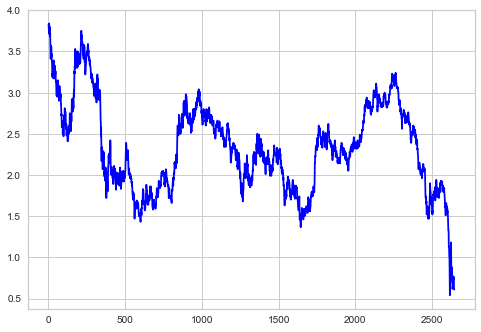

In [13]:
plt.plot(range(0,2646),df['TY10'],color='blue')
#plt.plot(range(0,2519),df_cleaned['TY10'],color='green')

<function matplotlib.pyplot.show(*args, **kw)>

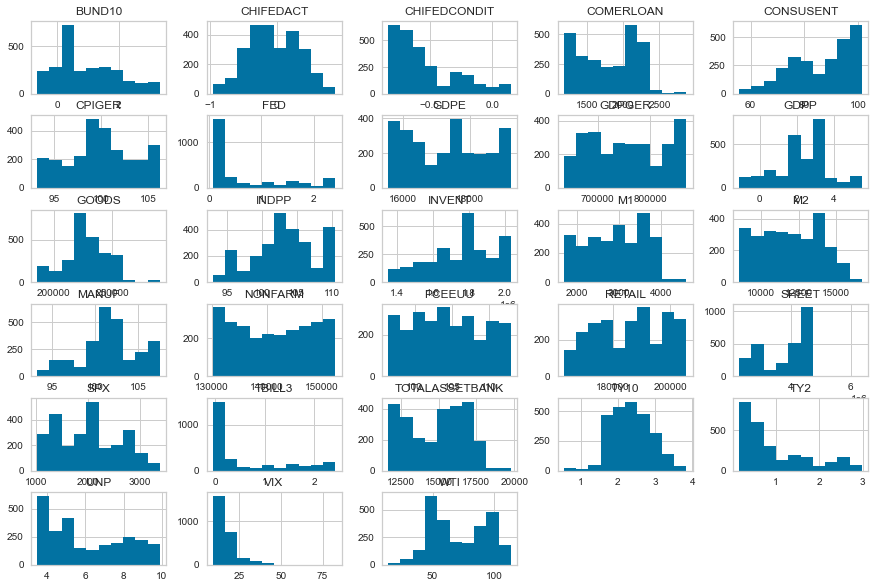

In [14]:
df.hist(figsize=(15, 10))
plt.show

In [15]:
print(df.columns.values)

['TY10' 'FED' 'SHEET' 'BUND10' 'UNP' 'SPX' 'WTI' 'GDPE' 'PCEEUU' 'CPIGER'
 'RETAIL' 'GOODS' 'MANUF' 'INVENT' 'GDPP' 'INDPP' 'NONFARM' 'TBILL3' 'M2'
 'GDPGER' 'M1' 'VIX' 'COMERLOAN' 'TOTALASSETBANK' 'CHIFEDCONDIT'
 'CHIFEDACT' 'CONSUSENT' 'TY2']


In [16]:
df.info

<bound method DataFrame.info of             TY10   FED      SHEET  BUND10  UNP      SPX    WTI       GDPE  \
2010-04-19  3.83  0.20  2339345.0    3.06  9.9  1197.52  81.52  15557.277   
2010-04-20  3.82  0.20  2339345.0    3.06  9.9  1207.17  82.98  15557.277   
2010-04-21  3.77  0.20  2337556.0    3.06  9.9  1205.94  82.78  15557.277   
2010-04-22  3.80  0.20  2337556.0    3.06  9.9  1208.67  82.89  15557.277   
2010-04-23  3.84  0.20  2337556.0    3.06  9.9  1217.28  84.34  15557.277   
...          ...   ...        ...     ...  ...      ...    ...        ...   
2020-04-13  0.76  0.65  6083141.0   -0.54  4.4  2761.63  22.36  19221.970   
2020-04-14  0.76  0.65  6083141.0   -0.54  4.4  2846.06  22.36  19221.970   
2020-04-15  0.63  0.65  6367887.0   -0.54  4.4  2783.36  22.36  19221.970   
2020-04-16  0.61  0.65  6367887.0   -0.54  4.4  2799.55  22.36  19221.970   
2020-04-17  0.61  0.65  6367887.0   -0.54  4.4  2874.56  22.36  19221.970   

             PCEEUU      CPIGER  ...       

In [17]:
X=np.array(df.drop('TY10',axis=1))
y=np.array(df['TY10'])

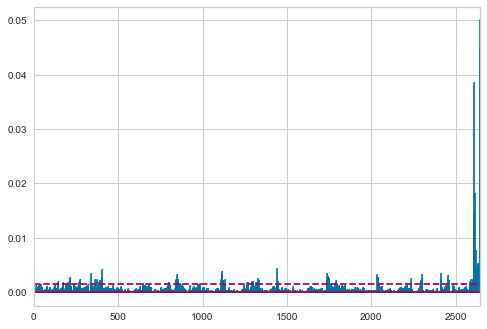

In [18]:
visualizer=CooksDistance()
visualizer.fit(X,y)
df["distancia"]=visualizer.distance_

<function matplotlib.pyplot.show(*args, **kw)>

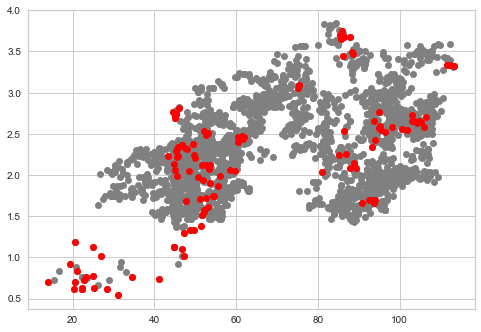

In [19]:
col=df.columns[-23]
plt.plot(df[col],df['TY10'],'o',color='gray')
plt.plot(df[df['distancia']>0.0015][col],df[df['distancia']>0.0015]['TY10'],'o',color='red')
plt.show

In [20]:
df_cleaned=df[df["distancia"]<=0.0015]
X=np.array(df_cleaned.drop('TY10',axis=1))
y=np.array(df_cleaned['TY10'])

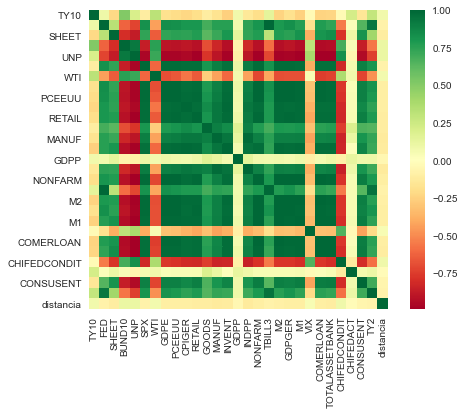

In [21]:
sns.heatmap(df_cleaned.corr(), square=True, cmap='RdYlGn')  # Revisamos rapidamente la matriz de correlacion

In [22]:
# Matriz de correlación en valor absoluto
Correlaciones = df_cleaned.corr().abs()
Correlaciones = Correlaciones.where(np.triu(np.ones(Correlaciones.shape), k=1).astype(np.bool))
Correlaciones.head(10)

,TY10,FED,SHEET,BUND10,UNP,SPX,WTI,GDPE,PCEEUU,CPIGER,...,GDPGER,M1,VIX,COMERLOAN,TOTALASSETBANK,CHIFEDCONDIT,CHIFEDACT,CONSUSENT,TY2,distancia
TY10,NaN,0.095947,0.211599,0.513073,0.204732,0.109638,0.317073,0.179588,0.203172,0.222518,...,0.178353,0.243904,0.027621,0.237838,0.229836,0.031812,0.218196,0.144368,0.288873,0.076469
FED,NaN,NaN,0.326482,0.614884,0.723091,0.828816,0.434074,0.843716,0.829351,0.804381,...,0.836520,0.771322,0.178433,0.775020,0.742677,0.551613,0.027058,0.647006,0.932864,0.071359
SHEET,NaN,NaN,NaN,0.800783,0.866203,0.742257,0.640664,0.742342,0.754499,0.746956,...,0.754505,0.814087,0.385570,0.806074,0.843529,0.778540,0.106733,0.820135,0.413202,0.105381
BUND10,NaN,NaN,NaN,NaN,0.928256,0.861425,0.756508,0.901777,0.907321,0.892727,...,0.896723,0.926991,0.313495,0.934522,0.929630,0.684455,0.044519,0.860431,0.561170,0.112435
UNP,NaN,NaN,NaN,NaN,NaN,0.956718,0.717102,0.968811,0.971164,0.954461,...,0.971644,0.983527,0.393677,0.981868,0.987432,0.829595,0.053886,0.934763,0.735975,0.109396
SPX,NaN,NaN,NaN,NaN,NaN,NaN,0.613303,0.984086,0.983829,0.970068,...,0.981607,0.972076,0.393290,0.961930,0.968539,0.821158,0.063055,0.894290,0.809253,0.076237
WTI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.686008,0.657174,0.565009,...,0.682341,0.682978,0.050233,0.740887,0.725361,0.374660,0.078688,0.719443,0.479437,0.073280
GDPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.996172,0.972798,...,0.996582,0.985450,0.309558,0.986769,0.982717,0.766363,0.034095,0.895720,0.814562,0.095720
PCEEUU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.984197,...,0.996098,0.992111,0.324780,0.987218,0.984350,0.784065,0.043373,0.891913,0.792458,0.095128
CPIGER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.972514,0.977165,0.367607,0.962223,0.961924,0.814679,0.042457,0.865343,0.747261,0.095209


In [23]:
columnas_iguales = [column for column in Correlaciones.columns if any(Correlaciones[column] > 0.95)]
print('Se eliminaran las siguientes columnas pues su coeficiente de correlación es mayor al 95%')
columnas_iguales

Se eliminaran las siguientes columnas pues su coeficiente de correlación es mayor al 95%


['SPX',
 'GDPE',
 'PCEEUU',
 'CPIGER',
 'RETAIL',
 'INVENT',
 'INDPP',
 'NONFARM',
 'TBILL3',
 'M2',
 'GDPGER',
 'M1',
 'COMERLOAN',
 'TOTALASSETBANK',
 'TY2']

In [24]:
df_cleaned = df_cleaned.drop(columns = columnas_iguales)
df_cleaned=df_cleaned.drop('distancia',axis=1)

In [25]:
X_cleaned=np.array(df_cleaned.drop('TY10',axis=1))
y_cleaned=np.array(df_cleaned['TY10'])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_trainc, X_testc, y_trainc, y_testc = train_test_split(X_cleaned, y_cleaned, test_size=0.33, random_state=42)

### Métodos sin ingenieria de caracteristicas

In [27]:
seleccionadas=SelectKBest(f_classif,k=7).fit(X,y)
atributos=seleccionadas.get_support()
df.drop('TY10',axis=1).columns[atributos]

Index(['SHEET', 'BUND10', 'MANUF', 'INVENT', 'M1', 'VIX', 'TOTALASSETBANK'], dtype='object')

In [28]:
list(df.drop('TY10',axis=1).columns[atributos])

['SHEET', 'BUND10', 'MANUF', 'INVENT', 'M1', 'VIX', 'TOTALASSETBANK']

In [29]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.feature_importances_

array([0.02412267, 0.01802042, 0.49894374, 0.00465247, 0.00570537,
       0.00396005, 0.00340107, 0.00144299, 0.01749052, 0.01801021,
       0.00389461, 0.00383295, 0.00216543, 0.00155034, 0.00536556,
       0.00125628, 0.00342993, 0.0114906 , 0.00224184, 0.00209682,
       0.00823508, 0.00980976, 0.00794343, 0.00712387, 0.00221741,
       0.00295987, 0.32480849, 0.00382821])

In [30]:
important=pd.DataFrame()
important["variable"]=list(df.drop('TY10',axis=1).columns)
important["Importancia"]=list(rf.feature_importances_)
Cols=list(important.nlargest(7,"Importancia")['variable'])
Cols

['BUND10', 'TY2', 'FED', 'SHEET', 'RETAIL', 'CPIGER', 'M2']

### Métodos con ingenieria de caracteristicas

In [31]:
seleccionadas=SelectKBest(f_classif,k=7).fit(X_cleaned,y_cleaned)
atributos2=seleccionadas.get_support()
df_cleaned.drop('TY10',axis=1).columns[atributos2]

Index(['SHEET', 'BUND10', 'UNP', 'WTI', 'MANUF', 'VIX', 'CHIFEDCONDIT'], dtype='object')

In [49]:
rf=RandomForestRegressor()
rf.fit(X_trainc,y_trainc)
rf.feature_importances_

array([0.01719174, 0.11619746, 0.58847048, 0.00839893, 0.0096087 ,
       0.02026445, 0.02924555, 0.01224601, 0.01341794, 0.16918467,
       0.00618688, 0.0095872 ])

In [50]:
important=pd.DataFrame()
important["variable"]=list(df_cleaned.drop('TY10',axis=1).columns)
important["Importancia"]=list(rf.feature_importances_)
Cols2=list(important.nlargest(7,"Importancia")['variable'])
Cols2

['BUND10', 'CHIFEDCONDIT', 'SHEET', 'MANUF', 'GOODS', 'FED', 'VIX']

### Se hará regresión con todas las columnas iniciales y luego con las variables seleccionadas despues del feature engineer

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [52]:
np.array(df_cleaned[list(df_cleaned.drop('TY10',axis=1).columns[atributos2])]),np.array(df_cleaned['TY10'])

(array([[ 2.339345e+06,  3.060000e+00,  9.900000e+00, ...,  9.330990e+01,
          1.734000e+01, -2.700000e-01],
        [ 2.339345e+06,  3.060000e+00,  9.900000e+00, ...,  9.330990e+01,
          1.573000e+01, -2.700000e-01],
        [ 2.337556e+06,  3.060000e+00,  9.900000e+00, ...,  9.330990e+01,
          1.632000e+01, -2.700000e-01],
        ...,
        [ 6.083141e+06, -5.400000e-01,  4.400000e+00, ...,  9.945660e+01,
          4.167000e+01, -2.000000e-02],
        [ 6.083141e+06, -5.400000e-01,  4.400000e+00, ...,  9.945660e+01,
          4.117000e+01, -2.000000e-02],
        [ 6.083141e+06, -5.400000e-01,  4.400000e+00, ...,  9.945660e+01,
          3.776000e+01, -2.000000e-02]]),
 array([3.83, 3.82, 3.77, ..., 0.73, 0.76, 0.76]))

In [53]:
lr=LinearRegression()
lr2=LinearRegression()
lr3=LinearRegression()
lr4=LinearRegression()

lr.fit(np.array(df[list(df.drop('TY10',axis=1).columns[atributos])]),df['TY10'])
lr2.fit(np.array(df[Cols]),df['TY10'])
lr3.fit(np.array(df_cleaned[list(df_cleaned.drop('TY10',axis=1).columns[atributos2])]),np.array(df_cleaned['TY10']))
lr4.fit(np.array(df_cleaned[Cols2]),df_cleaned['TY10'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
mean_squared_error(df['TY10'],lr.predict(np.array(df[list(df.drop('TY10',axis=1).columns[atributos])])))

0.06330565872271292

In [55]:
r2_score(df['TY10'],lr.predict(np.array(df[list(df.drop('TY10',axis=1).columns[atributos])])))

0.7845408115709664

In [56]:
mean_squared_error(df['TY10'],lr2.predict(np.array(df[Cols])))

0.02957071078433665

In [57]:
r2_score(df['TY10'],lr2.predict(np.array(df[Cols])))

0.8993568430466873

In [58]:
mean_squared_error(df_cleaned['TY10'],lr3.predict(np.array(df_cleaned[list(df_cleaned.drop('TY10',axis=1).columns[atributos2])])))

0.05065500361082696

In [59]:
r2_score(df_cleaned['TY10'],lr3.predict(np.array(df_cleaned[list(df_cleaned.drop('TY10',axis=1).columns[atributos2])])))

0.8151373601586183

In [60]:
mean_squared_error(df_cleaned['TY10'],lr4.predict(np.array(df_cleaned[Cols2])))

0.03521964011976098

In [61]:
r2_score(df_cleaned['TY10'],lr4.predict(np.array(df_cleaned[Cols2])))

0.8714678672846676

#### Se reduce el número de variables y el error aumenta muy poco. Es mucho más eficiente que tener todas las variables